In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="5" color="red">ch11_데이터프레임과 시리즈 (Pandas)</font><b>

- pip install pandas / conda install pandas (아나콘도 프롬프트)

# 1절. 판다스 패키지

- 데이터 분석을 위해 반드시 알아야 할 패키지, 넘파이 기반으로 다른 많은 라이브러리와 잘 통합되도록 설계
- 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터프레임(excel의 스프레드시트)을 제공
- 판다스의 장점 : 파일io, 부분 데이터 추출, 크기 변경, 데이터 분할, 병합, 정렬, 결측치 처리, 피벗과 언피벗(와이드포맷과 롱포멧)에 용이


- [패키지 INDEX] (https://pypi.org/project/pandas/)
- [Pandas API referrence] (https://pandas.pydata.org/docs/reference/index.html#api)
- [Pandas docs] (https://pandas.pydata.org/docs/)

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

In [3]:
data = pd.read_csv('data/ch09_member1.csv')# encoding='utf-8' 기본값
display(data)
type(data)

,홍길동,20,kildong@hong.com,서울시 관악구
0,김길동,40,kimdong@hong.com,서울시 영등포구
1,신길동,30,sindong@hong.com,서울시 동작구


pandas.core.frame.DataFrame

In [4]:
data = pd.read_json('data/ch09_member.json')
data

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


In [5]:
iris = pd.read_hdf('data/ch09_iris.hdf5', key='iris')
iris.head() # 상위 5개

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 2절. 데이터 프레임 만들기

## 2.1. 딕셔너리를 이용해서 데이터프레임 만들기

In [6]:
d = {'kor': [100, 90], 'mat': [95, 99]} # 딕셔너리를 데이터프레임으로
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,95
1,90,99


In [7]:
df.to_dict() # 데이터 프레임을 딕셔너리로 변환

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [8]:
df.to_numpy()

array([[100,  95],
       [ 90,  99]])

In [9]:
# 딕셔너리 리스트를 데이터프레임
d = [{'kor': 100, 'mat': 95}, {'kor': 90., 'mat': 99}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100.0,95
1,90.0,99


In [10]:
df.dtypes

kor    float64
mat      int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     2 non-null      float64
 1   mat     2 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


In [12]:
d = [{'kor': 100, 'mat': 100}, {'kor': 90, 'mat': 91},{'kor': 93}]
df = pd.DataFrame(data=d)
df

,kor,mat
0,100,100.0
1,90,91.0
2,93,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 176.0 bytes


In [14]:
d = [{
    'kor': 100,
    'mat': 100
}, {
    'kor': 90,
    'mat': 91
}, {
    'kor': 93,
    'eng': 100
}]
df = pd.DataFrame(data=d) # 결측치는 실수형 (float64), 정수형 변환 불가(결측치대체를 한후 정수형 변환)
df

,kor,mat,eng
0,100,100.0,NaN
1,90,91.0,NaN
2,93,NaN,100.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kor     3 non-null      int64  
 1   mat     2 non-null      float64
 2   eng     1 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 200.0 bytes


## 2.2. 리스트를 이용해서 데이터 프레임 만들기

In [16]:
title = ['책1', '책2', '책3']
price = [15000, 18000, 10000]

df = pd.DataFrame(data={'title': title, 'price': price})
df

,title,price
0,책1,15000
1,책2,18000
2,책3,10000


In [17]:
import numpy as np
print(np.c_[title, price])

df = pd.DataFrame(np.c_[title, price], columns=['책이름','가격'])
df

[['책1' '15000']
 ['책2' '18000']
 ['책3' '10000']]


,책이름,가격
0,책1,15000
1,책2,18000
2,책3,10000


In [18]:
l = [['책1',15000],
     ['책2', 18000],
     ['책3', 10000]]
df = pd.DataFrame(l,columns=['책이름','가격'])
df

,책이름,가격
0,책1,15000
1,책2,18000
2,책3,10000


## 2.3. read_csv 

In [19]:
%ls c:\ai_x\download\shareData\상가정보_20250331

ls: c:ai_xdownloadshareData상가정보_20250331: No such file or directory


In [91]:
df = pd.read_csv(
    r'/Volumes/DATA/mbc/ai_x/download/shareData/상가정보_20250331/소상공인시장진흥공단_상가(상권)정보_경기_202503.csv',
    encoding="utf-8",
    sep=",",
    low_memory=False,  # 데이터 용량이 클 경우에만 기입
    nrows=30,  # 처음 30행만
)
df.shape

(30, 39)

In [92]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000037,PENIEL,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,...,4115010100101320039021620,NaN,경기도 의정부시 시민로 132-1,480011,11697,NaN,NaN,NaN,127.049748,37.737903


In [93]:
# 판다스 디스플레이 옵션
pd.options.display.max_columns = 39  #기본값:20, 39열까지 display 가능
pd.options.display.max_rows = 40 # 40행까지 display 가능 (기본값 60)

df.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000037,PENIEL,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,시계 및 귀금속 소매업,41,경기도,41150,의정부시,41150510,의정부1동,4115010100,의정부동,4115010100101320039,1,대지,132,39.0,경기도 의정부시 의정부동 132-39,411503181060,경기도 의정부시 시민로,132,1.0,4115010100101320039021620,NaN,경기도 의정부시 시민로 132-1,480011,11697,NaN,NaN,NaN,127.049748,37.737903
1,MA010120220800000124,계림찜닭,NaN,I2,음식,I201,한식,I20110,닭/오리고기 구이/찜,I56111,한식 일반 음식점업,41,경기도,41173,안양시 동안구,41173610,범계동,4117310400,호계동,4117310400110540008,1,대지,1054,8.0,경기도 안양시 동안구 호계동 1054-8,411733183004,경기도 안양시 동안구 귀인로,155,NaN,4117310400110540008005136,목련마을우성7단지,경기도 안양시 동안구 귀인로 155,431725,14076,NaN,지,NaN,126.956324,37.384544


In [94]:
df.head().T

,0,1,2,3,4
상가업소번호,MA010120220800000037,MA010120220800000124,MA010120220800000126,MA010120220800000165,MA010120220800000176
상호명,PENIEL,계림찜닭,한마음부동산,미사리풀하우스,아름다운보석세상
지점명,NaN,NaN,NaN,NaN,NaN
상권업종대분류코드,G2,I2,L1,I2,G2
상권업종대분류명,소매,음식,부동산,음식,소매
상권업종중분류코드,G217,I201,L102,I201,G217
상권업종중분류명,시계·귀금속 소매,한식,부동산 서비스,한식,시계·귀금속 소매
상권업종소분류코드,G21701,I20110,L10203,I20107,G21701
상권업종소분류명,시계/귀금속 소매업,닭/오리고기 구이/찜,부동산 중개/대리업,돼지고기 구이/찜,시계/귀금속 소매업
표준산업분류코드,G47830,I56111,L68221,I56113,G47830


In [95]:
# (1) CSV 파일 불러오기 (기본값)
# encording = 'utf-8', sep=',', csv파일의 첫번째 줄을 header, #이 있는 줄도 데이터로 인식
member = pd.read_csv('data/ch11_member.csv')
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [96]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [97]:
# 형변환 Age열 : int64 -> int16 
member['Age'] = member['Age'].astype(np.int16) # int : np.int32
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int16 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int16(1), object(4)
memory usage: 332.0+ bytes


In [98]:
# 형변환 Birth 열 : object(문자) -> datetime64
member['Birth_as'] = member['Birth'].astype('datetime64')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_as  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int16(1), object(4)
memory usage: 380.0+ bytes


In [99]:
member['Birth_to'] = pd.to_datetime(member['Birth']) # astype()함수보다 안전한 형변환
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Name      6 non-null      object        
 1   Age       6 non-null      int16         
 2   Email     6 non-null      object        
 3   Address   6 non-null      object        
 4   Birth     6 non-null      object        
 5   Birth_as  6 non-null      datetime64[ns]
 6   Birth_to  6 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int16(1), object(4)
memory usage: 428.0+ bytes


In [100]:
# (2) 특정행 제외하고, csv 파일 읽기
member = pd.read_csv('data/ch11_membercp949.csv',
                     encoding="cp949",
                     skiprows=[1, 6]) # 1, 6번쨰 행은 제외하고 읽어오기
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [101]:
# (3) 주석(#) 제외, datetime형 필드 지정하여 읽기
member = pd.read_csv('data/ch11_membertab.csv', encoding="UTF-8",
                     sep="\t",
                     comment='#', # 주석(#) 제외
                     parse_dates=['Birth'] # datetime형으로 읽어올 필드 지정
                    )
print(member.info())
member

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes
None


,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [102]:
# (4) sep='|' 상위 몇행만 읽어오기
member = pd.read_csv('data/ch11_membersep.csv', encoding="UTF-8", 
                     sep="|",
                     nrows=3
                    )
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


## 2.4. 패키지에서 가져오기 : iris 데이터

### 2.4.1. iris 가져오기 방법1 : sklearn (머신러닝 패키지)

In [103]:
from sklearn import datasets
# from sklearn.datasets import load_iris

# sklearn : 머신러닝을 위한 함수(전처리함수, 머신러닝, 성능평가를 위한 함수)
iris = datasets.load_iris()
iris.keys()  # 딕셔너리 형태

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
print(iris.DESCR) # iris 데이터 셋에 대한 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [23]:
iris.data # 독립변수
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [24]:
iris.feature_names # 독립변수의 열이름
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
# 데이터 프레임 열이름
columns = [col[:-5].replace(" ", "_") for col in iris.feature_names] + ['species']
columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [26]:
iris.target_names
iris['target_names'] # 머신러딩시 종속변수

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
iris['target_names'][iris['target']]
iris.target_names[iris.target]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [28]:
# 독립변수 
data = iris.data
# 종속변수
target = iris.target_names[iris.target]

data.shape, target.shape # 독립변수와 종속변수의 차원

data, target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [29]:
# 독립변수와 종속변수를 stack 한후 데이터 프레임으로 
# target.reshape(-1,1)
# np.hstack((data, target.reshape(-1,1)))
pd.DataFrame(data=np.hstack((data, target.reshape(-1,1))), columns=columns)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### 2.4.2. iris 가져오기 방법2 : statsmodels (R 데이터)

In [30]:
# R언어에 있는 유명한 데이터셋을 가져오는 함수
from statsmodels.datasets import get_rdataset
iris_dataset = get_rdataset('iris', 
                            package='datasets', # R의 dataset 패키지에서 가져오고
                            cache=True # 한번 다운로드 한 데이터셋을 pc저장
                           )
iris_dataset

<class 'statsmodels.datasets.utils.Dataset'>

In [31]:
iris = iris_dataset.data
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [32]:
iris['Sepal.Length']
# iris.Sepal.Length # 열이름에 '.', ' ' 이 있으면 error iris.Sepal.Length 접근 불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [33]:
iris.columns = [col.replace(".","_").lower() for col in iris.columns]
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


### 2.4.3. iris 가져오기 방법3 : seaborn (시각화 패키지)

In [326]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [35]:
# 데이터 프레임을 csv 파일로 저장
iris.to_csv('data/ch11_iris.csv',
           # sep=',',encoding='utf-8', #기본값
            index=False # 행이름(idx)을 제외하고 파일 출력
           )

In [36]:
load_iris = pd.read_csv('data/ch11_iris.csv')
load_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [37]:
# 데이터 프래임을 압축파일(.zip, .gz, .bz2)로 저장
iris.to_csv('data/ch11_iris.bz2',
            index=False,
            compression='infer')

In [38]:
load_iris = pd.read_csv('data/ch11_iris.bz2', compression='infer')
load_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 3절. 이름(열, 행) 지정하기

## 3.1. 열이름 지정하기

In [39]:
member = pd.read_csv('data/ch11_member.csv',
                    comment='#',
                    parse_dates=['Birth'],
                    )
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [40]:
member.columns = ["이름", "나이","메일","주소","생년월일"] # 갯수를 맞춰야 에러가 안 남
# member.columns.name = '순번'
member.columns.name = None
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2. 행이름 지정하기

In [41]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [42]:
member.index = range(11, 16)
member

,이름,나이,메일,주소,생년월일
11,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
12,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
13,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
14,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
15,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [43]:
member.index = ['동','서','남','북','중']
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [44]:
# member.index.name="방향"
member.index.name=None
print(member.index.name)


None


In [45]:
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [46]:
member.loc['남', '이름']  # loc을 이용하여 행이름과 열이름으로 데이터 부분 조회

'홍길남'

In [47]:
# 특정을 index 로 setting
# member를 수정할려면, (1) 할당 (2) inplace 매개변수에 True (기본값은 False)

# (1) 할당
member1 = member.set_index("이름")  # 이름열이 index로 setting
# member1.index.name
member1

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [48]:
# (2) inplace 매개변수에 True (기본값은 False)
member.set_index('이름', inplace=True) # 이름열을 index로

In [49]:
member

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [50]:
member.head(1)

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [51]:
member.reset_index(inplace=True) # index를 컬럼(열)로

In [52]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [53]:
member.loc[1, '생년월일']

Timestamp('1999-12-01 00:00:00')

In [54]:
# 시리즈(날짜형).dt : datetime 열의 날짜 및 시간에 관련된 정보만 추출
member['생년월일'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: 생년월일, dtype: int64

In [55]:
member['생년월일'].dt.weekday # 0:월, 1:화 ~ 5:토, 6:일

0    4
1    2
2    0
3    5
4    5
Name: 생년월일, dtype: int64

## 3.3. 레벨 이름 지정하기

In [56]:
member.columns = [
                    ['기본정보','기본정보','기본정보','추가정보','추가정보'],
                    ['이름', '나이', '메일', '주소', '생년월일']
                 ]
member.columns.names = ["대분류","소분류"]
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소       생년월일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [57]:
member.index = [
                ['좌우','좌우','상하','상하','상하'],
                ['동','서','남','북','중']
            ]
member.index.names = ['레벨1','레벨2']
member

대분류     기본정보                        추가정보           
소분류       이름  나이             메일       주소       생년월일
레벨1 레벨2                                            
좌우  동    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
    서    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하  남    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
    북    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
    중    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [58]:
member.loc[('좌우','동'),'기본정보']

소분류
이름              홍길동
나이               20
메일    hong@hong.com
Name: (좌우, 동), dtype: object

# 4절. 부분 데이터 조회

- member['열이름'] : 특정열 가져오는 법
- member[조건]
- member.loc[행이름, 열이름]
- member.loc[행이름, 열이름:열이름]
- member.iloc[행번호, 열번호]

In [59]:
member = pd.read_csv('data/ch11_member.csv', comment="#", parse_dates=["Birth"])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1. 열 조회

In [60]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [61]:
member[['Name', 'Email']]

,Name,Email
0,홍길동,hong@hong.com
1,홍길서,seo@hong.com
2,홍길남,nam@hong.com
3,홍길북,buk@hong.com
4,홍길중,mid@hong.com


In [62]:
# member[0] # 행을 조회할 경우 .loc[], .iloc[] []안에 열이름이나, 조건만 사용 가능

## 4.2. loc을 이용한 조회 

- df.loc[행이름, 열이름] : 행이름과 열이름으로 조회
    * 행이름과 열이름 자리에 list ex.['Name','Email']
    * 행이름과 열이름 자리에 슬라이싱 from:to - from부터 to까지 (from, to포함)
    * 열이름 생략시 모든 열

In [63]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [64]:
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [65]:
# member 동행부터 남행
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [66]:
# member 동행부터 남행, 'Name', 'Age', 'Email'
member.loc['동':'남', 'Name':'Email']

,Name,Age,Email
동,홍길동,20,hong@hong.com
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com


In [67]:
# member 동행과 남행, 'Name', 'Email', 'Address'
member.loc[['동', '남'], ['Name', 'Email', 'Address']]

,Name,Email,Address
동,홍길동,hong@hong.com,서울시 강동구
남,홍길남,nam@hong.com,서울시 강동구


In [68]:
# loc을 이용한 특정 열 조회

# member.loc[:,'Name']
# member['name','Address']
member.loc[:,['Name','Address']] # member[['Name','Address']] 동일

,Name,Address
동,홍길동,서울시 강동구
서,홍길서,서울시 중구
남,홍길남,서울시 강동구
북,홍길북,서울시 관악구
중,홍길중,부산시 중구


In [69]:
member.loc['동'] # 결과가 1차원 : 시리즈

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [70]:
member.loc['동':'동'] # 슬라이싱의 경우 결과가 2차원 -> 데이터프레임

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


## 4.3. iloc()을 이용한 조회

- df.iloc[행번호, 열번호] : 행번호과 열번호으로 조회
    * 행번호과 열번호 자리에 list ex.[0, 2]
    * 행번호과 열번호 자리에 슬라이싱 from:to:by - from부터 by씩 증가하면서 to까지 (from, to미포함)
    * 열번호 생략시 모든 열

In [71]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [72]:
# 0번쨰 ~ 2번쨰 행 모든 열
# member.loc['동':'남']
member.iloc[0:3] # 열번호 생략시 모든 열

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [73]:
# member.iloc[0] # 결과가 1차원이면 시리즈. 데이터프레임으로 하고자 하면 슬라이싱 이용하거나
                 # pd.DataFrame() 함수 이용
member.iloc[0:1]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [74]:
# 짝수번째 행의 맨 마지막 열을 제외한 데이터 추출
member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [75]:
# 모든 행의 마지막 열만 데이터프레임으로 추출
# member.iloc[:,-1] # member.iloc[:,-1] 1차원
member.iloc[:,-1:]

,Birth
동,1999-01-01
서,1999-12-01
남,1999-11-01
북,1999-05-01
중,1999-01-30


In [76]:
# 0번쨰, 3번쨰행 | 0번쨰, 3번쨰 , 4번쨰 열
member.iloc[0:4:3, [0,3,4]]

,Name,Address,Birth
동,홍길동,서울시 강동구,1999-01-01
북,홍길북,서울시 관악구,1999-05-01


## 4.4. 조건으로 조회

- df[조건] : 조건에 맞는 행 (모든 열)
- df.loc[조건, 열이름] 또는 df[조건][열이름] : 조건에 맞는 행의 특정 열

In [77]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [78]:
member.Age > 22

동    False
서     True
남    False
북    False
중     True
Name: Age, dtype: bool

In [79]:
member[[False, True, False, False, True]]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [80]:
# Age가 22보다 큰 데이터 셋 가져오기
member[member.Age > 22]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [81]:
# Age가 22보다 큰 데이터 셋 가져오기
member.loc[member.Age > 22]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [82]:
# Age 가 22보다 큰 데이터의 Name 과 Age
member[member.Age > 22][['Name','Age']] # member[member.Age > 22][['Name':'Age']] 슬라이싱 안됨

,Name,Age
서,홍길서,30
중,홍길중,23


In [83]:
# Age 가 22보다 큰 데이터의 Name 과 Age

# member.loc[member.Age > 22,['Name','Age']]
member.loc[member.Age > 22,'Name':'Age']

,Name,Age
서,홍길서,30
중,홍길중,23


In [84]:
address1 = "서울시 강동구"
address2 = "부산시 중구"
print(address1.startswith('서울시'))
print(address2.startswith('서울시'))
print(address1.find('강동구') != -1)
print(address2.count('강동구') > 0)

True
False
True
False


※ 교안 pdf 29p. 
시리즈에 문자함수를 쓰기 위해 참조 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [85]:
member.Address.str.startswith('서울시')

동     True
서     True
남     True
북     True
중    False
Name: Address, dtype: bool

In [86]:
# Address 가 '서울시' 로 시작하는 행
member[member.Address.str.startswith('서울시')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [87]:
# Address 에 '강동구' 로 포함된 행
display(member[member.Address.str.count('강동구') > 0])
display(member[member.Address.str.find('강동구') != -1])

display(member[member.Address.str.contains('강동구')])

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [88]:
# Address 에 '강동구' 가 포함된 'Name','Age' 열 조회
display(member[member.Address.str.contains('강동구')][['Name','Age']])
display(member.loc[member.Address.str.contains('강동구'),['Name','Age']])

,Name,Age
동,홍길동,20
남,홍길남,21


,Name,Age
동,홍길동,20
남,홍길남,21


In [89]:
# 1999년도 태어난 데이터
member[member.Birth.dt.year < 2000]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


⭐︎ 데이터 프레임의 부분 데이터 조회 방법
- df[열이름] : 특정열 모든 행 조회
- df[조건] : 조건에 맞는 모든 행 조회
- df.loc[행이름, 열이름] : 이름조회, 조건(행이름자리)으로 조회 가능
    * 열이름을 생략하면 모든 열
    * 행이름, 열이름 자이레 list, 슬라이싱
- df.iloc[행번호, 열번호] : 번호 조회
    * 열번호를 생략하면 모든 열
    * 행번호, 열번호 자이레 list, 슬라이싱

# 중간 연습문제

In [115]:
display(load_iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [170]:
# 1. sepal_length 열만 출력
# display(load_iris.petal_length)
display(load_iris.loc[:, ['petal_length']])

,petal_length
0,1.4
1,1.4
2,1.3
3,1.5
4,1.4
...,...
145,5.2
146,5.0
147,5.2
148,5.4


In [173]:
# 2. 0~10행까지 마지막 열을 제외한 데이터 (loc, iloc)
display(load_iris.
        loc[:10, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
display(load_iris.iloc[:11, :-1])

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [174]:
# 3. 3~10 행중에 'sepal_length'와 'petal_length' 열만 (loc, iloc)
display(load_iris.loc[3:10, ['sepal_length', 'petal_length']])
display(load_iris.iloc[3:11, [0, 2]])

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [176]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
display(load_iris.loc[[0, 50, 100]])
# display(load_iris.loc[[:100:50]]) # 비추
display(load_iris.iloc[0:101:50])

SyntaxError: invalid syntax (4030900799.py, line 3)

In [179]:
# 5. 0번째, 25, 50번째, 75번, 100번째, 125번째 행의 petal_length와 petal_width (loc, iloc)
display(load_iris.loc[[0, 25, 50, 75, 100, 125],
                      ['petal_length', 'petal_width']])
display(load_iris.iloc[0:126:25, [2, 3]])
display(load_iris.iloc[0:126:25, 2:-1])

,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


,petal_length,petal_width
0,1.4,0.2
25,1.6,0.2
50,4.7,1.4
75,4.4,1.4
100,6.0,2.5
125,6.0,1.8


In [156]:
# 6. species가 versicolor인 데이터의 모든 열
display(load_iris.loc[load_iris.species.str.count('versicolor') > 0,
                      ['species']])

,species
50,versicolor
51,versicolor
52,versicolor
53,versicolor
54,versicolor
...,...
95,versicolor
96,versicolor
97,versicolor
98,versicolor


In [159]:
# 7. species가 setosa인 데이터 최초 5개 행만 출력
display(load_iris.loc[load_iris.species.str.count('setosa') > 0].head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [163]:
# 8. sepal_length가 6.5이상인 데이터 최초 5개 행만 출력
# load_iris.info()
display(load_iris.loc[load_iris.sepal_length > 6.5].head())

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor


In [164]:
# 9. sepal_length가 7.2이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length'
display(load_iris.loc[load_iris.sepal_length > 7.2],
        ['sepal_length', 'sepal_width', 'petal_length'])

,sepal_length,sepal_width,petal_length,petal_width,species
105,7.6,3.0,6.6,2.1,virginica
107,7.3,2.9,6.3,1.8,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
130,7.4,2.8,6.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica


['sepal_length', 'sepal_width', 'petal_length']

In [186]:
# 10. versicolor종중에서 sepal_length가 6.5보다 큰 데이터의 모든 열
display(load_iris.loc[(load_iris.species.str.count('versicolor') > 0)
                      & (load_iris.sepal_length > 6.5)])

# logical_and 사용
display(load_iris.loc[np.logical_and(load_iris.species.str.count('versicolor') > 0, load_iris.sepal_length > 6.5)])

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [181]:
# logical_and 설명
import numpy as np
np.logical_and(True, True)

True

# 5절. 데이터 추가 및 삭제

## 5.1. 데이터 프레임의 요소 삭제

- df.drop(행이이나 열이름, axis) : axis = 0 (행삭제) / axis = 1 (열삭제)

In [201]:
member = pd.read_csv('data/ch11_member.csv', comment='#', parse_dates=['Birth'])
member.index = ['동','서','남','북','중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [196]:
# (1) 단일 행 삭제
member.drop("중") # axis=0 이 기본값
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [202]:
# '중' 행이 없으면 에러
member.drop("동", inplace=True)
member

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [204]:
# (2) 복수행 삭제
member.drop(['서','남'])

,Name,Age,Email,Address,Birth
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [205]:
# (3) 열 삭제
member.drop(labels=['Age','Birth'], axis=1)

,Name,Email,Address
서,홍길서,seo@hong.com,서울시 중구
남,홍길남,nam@hong.com,서울시 강동구
북,홍길북,buk@hong.com,서울시 관악구
중,홍길중,mid@hong.com,부산시 중구


## 5.2. 데이터 프레임의 요소 추가

In [207]:
# 데이터 프레임에 열 추가 1 : 공통된 값으로 추가
member['favarite_no'] = 7 # int64
member

,Name,Age,Email,Address,Birth,favarite_no
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7


In [208]:
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 서 to 중
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         4 non-null      object        
 1   Age          4 non-null      int64         
 2   Email        4 non-null      object        
 3   Address      4 non-null      object        
 4   Birth        4 non-null      datetime64[ns]
 5   favarite_no  4 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 396.0+ bytes


In [212]:
# 데이터 프레임에 열추가 2 : 리스트로 추가

member['fn'] = [7,7,7,None] # 결측치 : None, np.nan
display(member)
print(member.info())

,Name,Age,Email,Address,Birth,favarite_no,fn
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7,7.0
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7,7.0
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7,7.0
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 서 to 중
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Name         4 non-null      object        
 1   Age          4 non-null      int64         
 2   Email        4 non-null      object        
 3   Address      4 non-null      object        
 4   Birth        4 non-null      datetime64[ns]
 5   favarite_no  4 non-null      int64         
 6   fn           3 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 428.0+ bytes
None


In [214]:
import math
None, np.nan, math.nan # 결측치

# 결측치는 정수형 반환 불가 (결측치 대체 후 형변환)
# member['fn'].astype('int')

(None, nan, nan)

In [217]:
pd.Series([7,7])

0    7
1    7
dtype: int64

In [222]:
# 데이터 프레임에 열추가 3 : 시리즈로 추가 (데이터 갯수가 부족하면, 나머지는 결측치)
member = pd.read_csv('data/ch11_member.csv',
                     comment='#',
                     parse_dates=['Birth'])
member['fn2'] = pd.Series([7, 7, 7])
member

,Name,Age,Email,Address,Birth,fn2
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [232]:
member['fn'] = pd.Series(['test','test1','test2'],index=[0,3,4])
pd.Series([7, 7, 7], index=[0, 3, 4])
# pd.Series([7, 7, 7], index=['Name', 'Age', 'No'])
member

,Name,Age,Email,Address,Birth,fn2,fn
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0,test
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0,NaN
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN,test1
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN,test2


In [233]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
 5   fn2      3 non-null      float64       
 6   fn       3 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 408.0+ bytes


In [ ]:
member

In [251]:
# 행 추가 : 추가할 데이터를 데이터프레임 -> 기존DF(member), 새로운DF(new_member) 연결
member = pd.read_csv('data/ch11_member.csv')
new_member = pd.DataFrame([{
    'Name': '홍길숙',
    'Age': 30,
    'Email': 'h@h.com',
    'Address': '서울시 영등포구',
    'Birth': '2010-01-01'
}])

new_member

,Name,Age,Email,Address,Birth
0,홍길숙,30,h@h.com,서울시 영등포구,2010-01-01


In [252]:
# 행 추가시 member와 new_member 연결
member = pd.concat([member, new_member])
member


,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01
0,홍길숙,30,h@h.com,서울시 영등포구,2010-01-01


In [246]:
pd.concat([member, new_member], axis=0)  # axis=0(행) 기본값
                                         # axis=1(열)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01
0,홍길숙,30,h@h.com,서울시 영등포구,2010-01-01
0,홍길숙,30,h@h.com,서울시 영등포구,2010-01-01


In [253]:
# 인덱스 재조정
# member.index = range(len(member)) # 비추
member = member.reset_index(drop=True)  # 기존 index를 drop하고 새로운 index로 재조정
# member.reset_index() # 기존의 index를 컬럼에 편입시키고, 새로운 연속된 index를 생성
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01
6,홍길숙,30,h@h.com,서울시 영등포구,2010-01-01


# 6절. 병합과 연결

## 6.1. merge()를 이용한 병합

In [256]:
df1 = pd.DataFrame({'key': ['a', 'b', 'c', 'd'], 'c1': [1, 2, 3, 4]})
df2 = pd.DataFrame({'key': ['a', 'b', 'c', 'e'], 'c2': [5, 6, 7, 8]})

display(df1)
display(df2)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [260]:
display(df1.merge(right=df2))  # hpw='inner' : 양쪽 다 일치하는 데이터만 남김

,key,c1,c2
0,a,1,5
1,b,2,6
2,c,3,7


In [261]:
display(df1.merge(right=df2, how='left'))  # 왼쪽 데이터만 남기고, 오른쪽에 매칭되는 것만 병합

,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [262]:
display(df1.merge(right=df2, how='right'))  # 오른쪽 데이터만 남기고, 왼쪽에 데티어에 매칭되는 것만 병합

,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,c,3.0,7
3,e,NaN,8


In [263]:
display(df1.merge(df2, how='outer'))  # 양쪽 모두 다 날림

,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,7.0
3,d,4.0,NaN
4,e,NaN,8.0


In [270]:
df3 = pd.DataFrame({'key3': ['a', 'b', 'c', 'd'], 'c1': [1, 2, 3, 4]})
df4 = pd.DataFrame({'key4': ['a', 'b', 'c', 'e'], 'c2': [5, 6, 7, 8]})

display(df3)
display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,5
1,b,6
2,c,7
3,e,8


In [266]:
df3.merge(df4)  # error

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [267]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='inner')

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7


In [268]:
df3.merge(right=df4, left_on='key3', right_on='key4', how='outer')

,key3,c1,key4,c2
0,a,1.0,a,5.0
1,b,2.0,b,6.0
2,c,3.0,c,7.0
3,d,4.0,NaN,NaN
4,NaN,NaN,e,8.0


In [269]:
df3.merge(right=df4, left_index=True,right_index=True) # pd.concat([df3, df4], 1) 와 유사

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


## 6.2. concat() 을 이용한 연결

- pd.concat( [df1, df2], axis=0 )
    * axis = 0 (기본값) : 위아래로 연결
    * axis = 1          : 좌우로 연결

In [277]:
df1 = pd.DataFrame({'key': ['a', 'b', 'c', 'd'], 'c1': [1, 2, 3, 4]})
df2 = pd.DataFrame({'key': ['a', 'b', 'c', 'e'], 'c1': [5, 6, 7, 8]})

display(df1)
display(df2)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c1
0,a,5
1,b,6
2,c,7
3,e,8


In [279]:
pd.concat([df1, df2], axis=0).reset_index(drop=True)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4
4,a,5
5,b,6
6,c,7
7,e,8


In [ ]:
df3 = pd.DataFrame({'key3': ['a', 'b', 'c', 'd'], 'c1': [1, 2, 3, 4]})
df4 = pd.DataFrame({'key4': ['a', 'b', 'c', 'e'], 'c2': [5, 6, 7, 8]})

display(df3)
display(df4)

In [280]:
# 좌우연결
pd.concat([df3, df4], axis=1)

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,e,8


# 7절. 정렬 (행이름, 열이름, 값에 의한 정렬)

- '100' < '9'

- df.sort_index(axis) : 행(axis=0) 또는 열(axis=1) 이름으로 정렬
- df.sort_values(by=정렬기준이 될 열이름, acending=T/F, inplace=T/F) : 값에 의한 정렬

In [293]:
member = pd.read_csv('data/ch11_member.csv', comment="#")
member.index = ['동', '서', '남', '북', '중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1. 행이름으로 정렬

In [294]:
display(member.sort_index(axis=0))
member.sort_index(axis='rows', ascending=False,
                  inplace=True)  # ascending = True (기본, 오름차순)
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


## 7.2. 열이름으로 정렬

In [296]:
display(member.sort_index(axis=1))
member.sort_index(axis='columns', ascending=False, inplace=True)

member

,Address,Age,Birth,Email,Name
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남


,Name,Email,Birth,Age,Address
중,홍길중,mid@hong.com,1999-01-30,23,부산시 중구
서,홍길서,seo@hong.com,1999-12-01,30,서울시 중구
북,홍길북,buk@hong.com,1999-05-01,22,서울시 관악구
동,홍길동,hong@hong.com,1999-01-01,20,서울시 강동구
남,홍길남,nam@hong.com,1999-11-01,21,서울시 강동구


## 7.3. 값에 의한 정렬



In [297]:
member

,Name,Email,Birth,Age,Address
중,홍길중,mid@hong.com,1999-01-30,23,부산시 중구
서,홍길서,seo@hong.com,1999-12-01,30,서울시 중구
북,홍길북,buk@hong.com,1999-05-01,22,서울시 관악구
동,홍길동,hong@hong.com,1999-01-01,20,서울시 강동구
남,홍길남,nam@hong.com,1999-11-01,21,서울시 강동구


In [311]:
member.sort_values(by='Age') # 'Age' 열 데이터 기준으로 오름차순으로 정렬 ()

,Name,Email,Birth,Age,Address
동,홍길동,hong@hong.com,1999-01-01,20,서울시 강동구
남,홍길남,nam@hong.com,1999-11-01,21,서울시 강동구
북,홍길북,buk@hong.com,1999-05-01,22,서울시 관악구
중,홍길중,mid@hong.com,1999-01-30,23,부산시 중구
서,홍길서,seo@hong.com,1999-12-01,30,서울시 중구


In [312]:
member.sort_values(by='Age', ascending=False, inplace=True) # 'Age' 내림차순
member

,Name,Email,Birth,Age,Address
서,홍길서,seo@hong.com,1999-12-01,30,서울시 중구
중,홍길중,mid@hong.com,1999-01-30,23,부산시 중구
북,홍길북,buk@hong.com,1999-05-01,22,서울시 관악구
남,홍길남,nam@hong.com,1999-11-01,21,서울시 강동구
동,홍길동,hong@hong.com,1999-01-01,20,서울시 강동구


In [322]:
# 'Address' 기준으로 오른차순 정렬, 'Address'가 같으면, 'Age' 오름차순 
member.sort_values(by=['Address','Age'])

,Name,Email,Birth,Age,Address
중,홍길중,mid@hong.com,1999-01-30,23,부산시 중구
동,홍길동,hong@hong.com,1999-01-01,20,서울시 강동구
남,홍길남,nam@hong.com,1999-11-01,21,서울시 강동구
북,홍길북,buk@hong.com,1999-05-01,22,서울시 관악구
서,홍길서,seo@hong.com,1999-12-01,30,서울시 중구


In [325]:
# 'Address' 기준으로 오른차순 정렬, 'Address'가 같으면, 'Age' 내림차순
member.sort_values(by=['Address', 'Age'],
                   ascending=[True, False],
                   inplace=True)
member

,Name,Email,Birth,Age,Address
중,홍길중,mid@hong.com,1999-01-30,23,부산시 중구
남,홍길남,nam@hong.com,1999-11-01,21,서울시 강동구
동,홍길동,hong@hong.com,1999-01-01,20,서울시 강동구
북,홍길북,buk@hong.com,1999-05-01,22,서울시 관악구
서,홍길서,seo@hong.com,1999-12-01,30,서울시 중구


## 중간 연습문제

In [327]:
# iris 데이터 셋
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# (1) sepal_length 값, 기준 (sepal_length 같으면, sepal_width 기준) 내림차순 정렬 적용 (iris에서 적용)
# (2) 행이름(index) 기준으로  정렬 적용 (iris에서 적용)
# (3) 열이름(column) 기준 정렬한 내용을 줄력 (iris 에 적용하지 말것)

In [335]:
iris.sort_values(by=['sepal_length','sepal_width'], ascending=False, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


In [336]:
iris.sort_index(axis=0, inplace=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [337]:
# (3) 열이름(column) 기준 정렬한 내용을 줄력 (iris 에 적용하지 말것)
iris.sort_index(axis=1)


,petal_length,petal_width,sepal_length,sepal_width,species
0,1.4,0.2,5.1,3.5,setosa
1,1.4,0.2,4.9,3.0,setosa
2,1.3,0.2,4.7,3.2,setosa
3,1.5,0.2,4.6,3.1,setosa
4,1.4,0.2,5.0,3.6,setosa
...,...,...,...,...,...
145,5.2,2.3,6.7,3.0,virginica
146,5.0,1.9,6.3,2.5,virginica
147,5.2,2.0,6.5,3.0,virginica
148,5.4,2.3,6.2,3.4,virginica


# 8절. 기초 통계 분석

    * 판다스 : 기초통계 / statsmodels : 난이도 있는 통계

- count : NaN 을 제외한 갯수
- min
- max
- sum
- cumsum  : 누적합
- cumprod : 누적곱
- **mean**
- rolling(n).mean() : 데이터 변동(노이즈) 가 다소 있을떄, 추세(패턴)을 부드럽게 보고 싶을 떄 
- **var** : 분산
- **std** : 표준편차
- **median** : 중위수 (50%지점)
- **qunantile** : 분위수 - 0사분위수, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 4사분위수(100%)
![분위수]<img src="https://mblogthumb-phinf.pstatic.net/MjAyMTA5MDZfMjM3/MDAxNjMwOTA1OTkyNzAx.koE9Lph5IyE9wSY2NPW-FzsPTGYDhhslQLSc4FfD4Cog.JZwMGEopEGv_n3RzJIamXudL8Zv7yFF1RP0E8nbwvw0g.PNG.fbfbf1/image.png?type=w800" width="500" height="500">
```
    이상치를 구하는 공식
    IQR = Q3 - Q1
    Q1 - 1.5 * IQR ~ Q3 + 1.5 * IQR 이 이외의 값은 이상치
    
    max(Q4)
    Q3
    Q2
    Q1
    min
```
- ✤ describe : 요약통계량
- corr : 상관관게 (계수)

In [6]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.columns = [col.lower().replace(".","_") for col in iris.columns]
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

## 8.1. min, max, mean, std ...

In [9]:
iris.min(axis=0) #열별 최소값 (문자필드는 코드값이 작은 것)

sepal_length       4.3
sepal_width        2.0
petal_length       1.0
petal_width        0.1
species         setosa
dtype: object

In [13]:
iris.median(axis=0, numeric_only=True) # 행들의 중수(열별 중위수)
# 평균, 중위수, 표준편차, 분산 ... : 숫자필드만 가능
# numeric_only=True : numeric만 적용 (int, float)

sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64

In [29]:
X = iris.iloc[:,:-1]
X.sample(10)

,sepal_length,sepal_width,petal_length,petal_width
65,6.7,3.1,4.4,1.4
82,5.8,2.7,3.9,1.2
116,6.5,3.0,5.5,1.8
112,6.8,3.0,5.5,2.1
122,7.7,2.8,6.7,2.0
78,6.0,2.9,4.5,1.5
110,6.5,3.2,5.1,2.0
20,5.4,3.4,1.7,0.2
84,5.4,3.0,4.5,1.5
11,4.8,3.4,1.6,0.2


In [34]:
x.std(axis=0)
x.std(axis='index')

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
dtype: float64

In [42]:
display(x.std(axis=1))

0      2.179449
1      2.036950
2      1.997498
3      1.912241
4      2.156386
         ...   
145    2.021551
146    2.075853
147    2.046745
148    1.791415
149    1.884144
Length: 150, dtype: float64

In [48]:
# qunantile : 데이터프레임이나 시리즈에서 사분인수
# interpolation="nearest" : 정확한 구간의 값이 없을 경우 가까운 데이터 출력
df = pd.DataFrame(data=[1, 3, 4, 7, 10], columns=['value'])
df['value'].quantile(q=[0, 0.25, 0.5, 0.75, 1.], interpolation="nearest")

0.00     1
0.25     3
0.50     4
0.75     7
1.00    10
Name: value, dtype: int64

In [49]:
# interpolation="midpoint" : 정확한 구간을 출력
df['value'].quantile(q=[0, 0.3, 0.55, 0.75, 1.], interpolation="midpoint")

0.00     1.0
0.30     3.5
0.55     5.5
0.75     7.0
1.00    10.0
Name: value, dtype: float64

In [53]:
quat = X.quantile(q = [0,0.25, 0.5, 0.75, 1.])
quat

,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


In [57]:
min = quat.iloc[0, 0]
max = quat.iloc[4, 0]

q1 = quat.iloc[1, 0]
q3 = quat.iloc[3, 0]

min < q1 - 1.5 * (q3 - q1), max > q3 + 1.5 * (q3 - q1)

(False, False)

In [60]:
X.shape, X.count(axis=0) # 결측치를 제외한 데이터 갯수

((150, 4),
 sepal_length    150
 sepal_width     150
 petal_length    150
 petal_width     150
 dtype: int64)

In [68]:
X.head(10)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [69]:
X.rolling(5).sum().iloc[4:]

,sepal_length,sepal_width,petal_length,petal_width
4,24.3,16.4,7.0,1.0
5,24.6,16.8,7.3,1.2
6,24.3,17.2,7.3,1.3
7,24.6,17.4,7.5,1.3
8,24.4,17.2,7.4,1.3
...,...,...,...,...
145,32.9,15.3,27.0,11.3
146,32.3,14.7,26.9,10.9
147,33.0,15.0,27.0,11.0
148,32.4,15.2,26.5,11.0


## 8.2. 요약 통계량

In [75]:
# 1) 기본 요약 통계량

iris.describe()  # 숫자열과 문자열이 같이 있을 경우 : 숫자열만

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
# 문자열에서의 요약통계량 : 데이터갯수, 데이터종류(unique), 최빈데이터(top), 최빈데이터갯수(freq)
iris['species'].describe()


count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

In [80]:
# 2) describe() 의 include, exclude 매개변수
df = pd.DataFrame(data={
    'a': [1, 2, 3] * 2,
    'b': [2., 1] * 3,
    'c': ['aaa'] * 5 + ['bbb'],
    'd': [True, False]*3
})
display(df)
df.info()

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [81]:
df.describe() # 숫자열만 기본 요약 통계량

,a,b
count,6.000000,6.000000
mean,2.000000,1.500000
std,0.894427,0.547723
min,1.000000,1.000000
25%,1.250000,1.000000
50%,2.000000,1.500000
75%,2.750000,2.000000
max,3.000000,2.000000


In [85]:

df.describe(include=['float64', 'bool'])

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


,b,d
count,6.000000,6
unique,NaN,2
top,NaN,True
freq,NaN,3
mean,1.500000,NaN
std,0.547723,NaN
min,1.000000,NaN
25%,1.000000,NaN
50%,1.500000,NaN
75%,2.000000,NaN


In [86]:
display(df)
df.describe(include='all')

,a,b,c,d
0,1,2.0,aaa,True
1,2,1.0,aaa,False
2,3,2.0,aaa,True
3,1,1.0,aaa,False
4,2,2.0,aaa,True
5,3,1.0,bbb,False


,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,2,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,5,3
mean,2.000000,1.500000,NaN,NaN
std,0.894427,0.547723,NaN,NaN
min,1.000000,1.000000,NaN,NaN
25%,1.250000,1.000000,NaN,NaN
50%,2.000000,1.500000,NaN,NaN
75%,2.750000,2.000000,NaN,NaN


In [87]:
df.describe(exclude=object) # object 형인 컬럼만 제외하고 기본 통계량

,a,b,d
count,6.000000,6.000000,6
unique,NaN,NaN,2
top,NaN,NaN,True
freq,NaN,NaN,3
mean,2.000000,1.500000,NaN
std,0.894427,0.547723,NaN
min,1.000000,1.000000,NaN
25%,1.250000,1.000000,NaN
50%,2.000000,1.500000,NaN
75%,2.750000,2.000000,NaN


In [96]:
df['c'].unique() # 특정 컬럼의 고유 값들의 종료

array(['aaa', 'bbb'], dtype=object)

In [97]:
df['c'].value_counts() # 많이 씀

aaa    5
bbb    1
Name: c, dtype: int64

In [98]:
df.select_dtypes(include=object) # object 형 컬럼만 추출

,c
0,aaa
1,aaa
2,aaa
3,aaa
4,aaa
5,bbb


In [99]:
df.select_dtypes(exclude=object) # object 형 컬럼만 뺴고 추출

,a,b,d
0,1,2.0,True
1,2,1.0,False
2,3,2.0,True
3,1,1.0,False
4,2,2.0,True
5,3,1.0,False


## 8.3. 공분산, 상관계수

In [102]:
X = iris.iloc[:, :-1]
x.cov()  # 공분산

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


In [103]:
# -1 <= 상관게수 <= 1
X.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


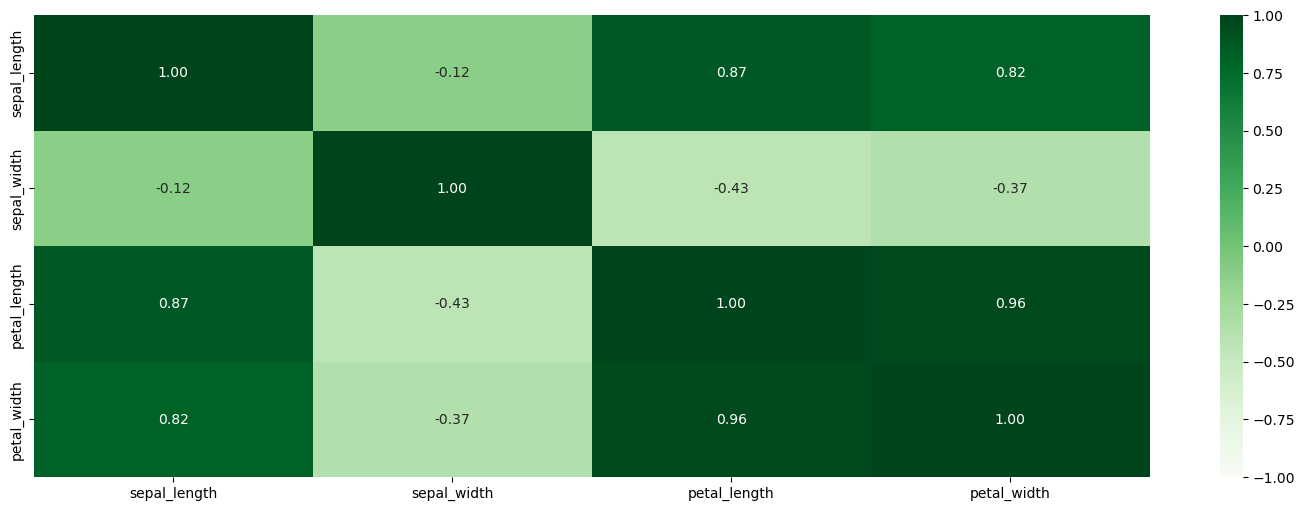

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='Greens')
plt.show()